In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv("heart.csv")  # put the CSV file in the same folder as your notebook

# Step 3: Explore the dataset
print("Shape of dataset:", df.shape)
print("First 5 rows:")
print(df.head())

# Step 4: Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Step 5: Data types and basic info
print("\nInfo:")
print(df.info())

# Step 6: Summary statistics
print("\nStatistics:")
print(df.describe())


Shape of dataset: (918, 12)
First 5 rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Missing values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR   

In [2]:
# Step 1: Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 2: Separate input and output
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

# Step 3: Split into train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (734, 15)
Test set size: (184, 15)


In [4]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Step 2: Predict
y_pred = model.predict(X_test)

# Step 3: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8695652173913043

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184


Confusion Matrix:
[[66 11]
 [13 94]]


C:\Users\nacha\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:54:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


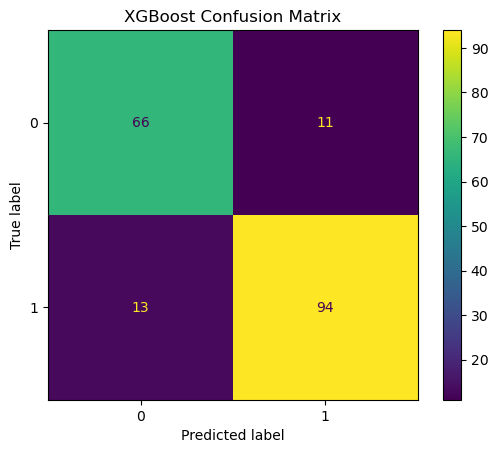

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix Visualization
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("XGBoost Confusion Matrix")
plt.show()


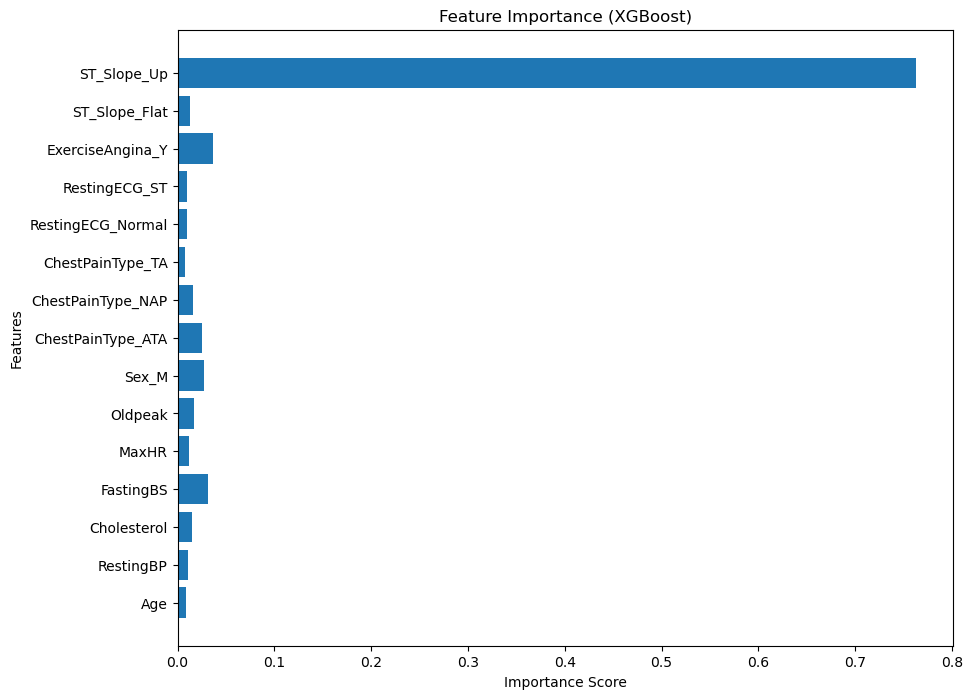

In [9]:
# Feature Importance
importances = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10,8))
plt.barh(X.columns, importances)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


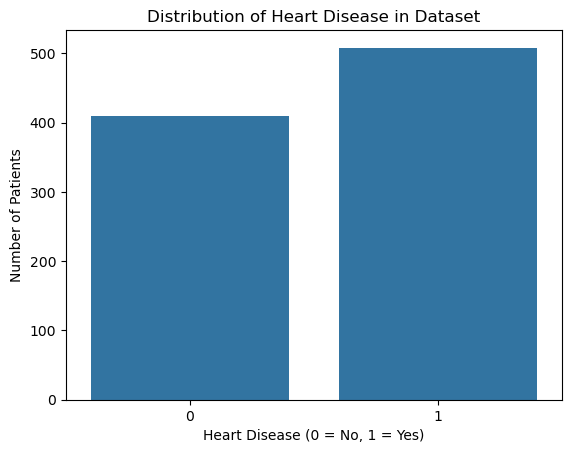

In [11]:
# Distribution of Heart Disease (target variable)
sns.countplot(x='HeartDisease', data=df)
plt.title("Distribution of Heart Disease in Dataset")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.show()
